Analytic Coefficients: beta_0 = 1.2363636363636363, beta_1 = 1.1696969696969697
SSE (Analytic): 5.624242424242423
R^2 (Analytic): 0.952538038613988




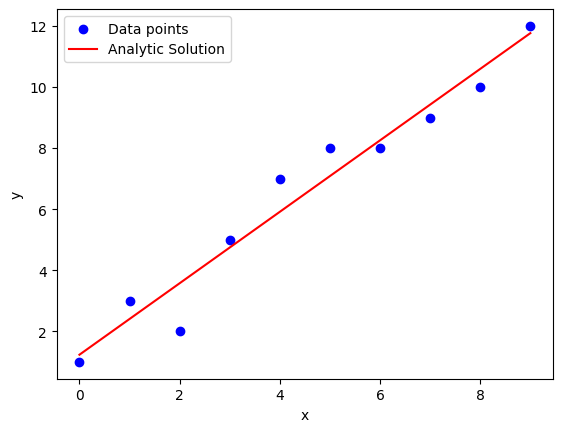

In [13]:
"""
     Linear Regression using Analytic Formulation
"""

import numpy as np
import matplotlib.pyplot as plt

# Data
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

# Compute means of x and y
x_mean = np.mean(x)
y_mean = np.mean(y)

# Compute beta_1 and beta_0
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)
beta_1 = numerator / denominator
beta_0 = y_mean - beta_1 * x_mean

# Make predictions
y_pred = beta_0 + beta_1 * x

# Compute SSE and R^2
SSE = np.sum((y - y_pred) ** 2)
SST = np.sum((y - y_mean) ** 2)
R_squared = 1 - (SSE / SST)

print(f"Analytic Coefficients: beta_0 = {beta_0}, beta_1 = {beta_1}")
print(f"SSE (Analytic): {SSE}")
print(f"R^2 (Analytic): {R_squared}")

print("\n")
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Analytic Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

GD Coefficients: beta_0 = 1.175803611388339, beta_1 = 1.1793547634798334
SSE (GD): 5.634861529064237
R^2 (GD): 0.9524484259150697




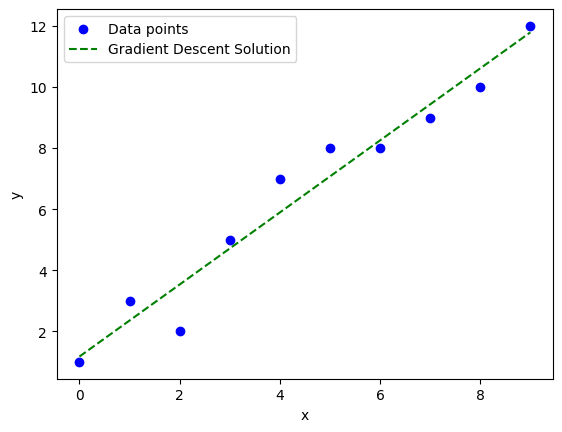

In [15]:
"""
     Full-batch Gradient Descent for Linear Regression
"""

def gradient_descent_full(x, y, alpha, iterations):
    n = len(x)
    beta_0, beta_1 = 0, 0

    for i in range(iterations):
        y_pred = beta_0 + beta_1 * x
        error = y_pred - y

        # Update the coefficients
        beta_0 -= alpha * (1/n) * np.sum(error)
        beta_1 -= alpha * (1/n) * np.sum(error * x)

    return beta_0, beta_1

# Hyperparameters
alpha = 0.01
iterations = 1000

# Apply Full-batch Gradient Descent
beta_0_gd, beta_1_gd = gradient_descent_full(x, y, alpha, iterations)

# Predict using the GD coefficients
y_pred_gd = beta_0_gd + beta_1_gd * x

# Compute SSE and R^2 for GD
SSE_gd = np.sum((y - y_pred_gd) ** 2)
R_squared_gd = 1 - (SSE_gd / SST)

print(f"GD Coefficients: beta_0 = {beta_0_gd}, beta_1 = {beta_1_gd}")
print(f"SSE (GD): {SSE_gd}")
print(f"R^2 (GD): {R_squared_gd}")

print("\n")
plt.scatter(x, y, color='blue', label='Data points')
#plt.plot(x, y_pred, color='red', label='Analytic Solution')
plt.plot(x, y_pred_gd, color='green', linestyle='--', label='Gradient Descent Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

SGD Coefficients: beta_0 = 1.2391871097185163, beta_1 = 1.167766666450319
SSE (SGD): 5.62489356000759
R^2 (SGD): 0.9525325437974043




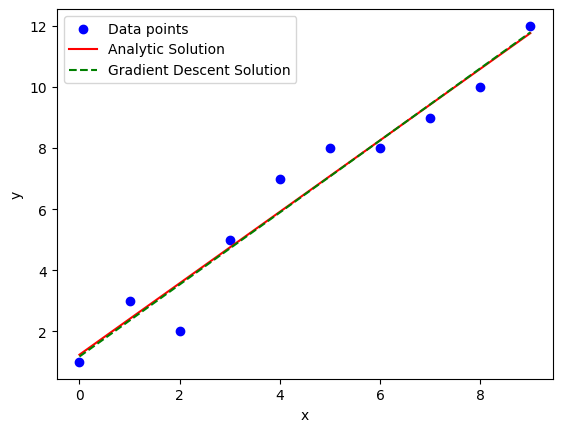

In [16]:
"""
    Stochastic Gradient Descent for Linear Regression
"""

def gradient_descent_sgd(x, y, alpha, iterations):
    n = len(x)
    beta_0, beta_1 = 0, 0

    for i in range(iterations):
        for j in range(n):
            random_index = np.random.randint(n)
            x_j = x[random_index]
            y_j = y[random_index]
            y_pred = beta_0 + beta_1 * x_j
            error = y_pred - y_j

            # Update the coefficients
            beta_0 -= alpha * error
            beta_1 -= alpha * error * x_j

    return beta_0, beta_1

# Apply Stochastic Gradient Descent
beta_0_sgd, beta_1_sgd = gradient_descent_sgd(x, y, alpha, iterations)

# Predict using the SGD coefficients
y_pred_sgd = beta_0_sgd + beta_1_sgd * x

# Compute SSE and R^2 for SGD
SSE_sgd = np.sum((y - y_pred_sgd) ** 2)
R_squared_sgd = 1 - (SSE_sgd / SST)

print(f"SGD Coefficients: beta_0 = {beta_0_sgd}, beta_1 = {beta_1_sgd}")
print(f"SSE (SGD): {SSE_sgd}")
print(f"R^2 (SGD): {R_squared_sgd}")

print("\n")
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Analytic Solution')
plt.plot(x, y_pred_gd, color='green', linestyle='--', label='Gradient Descent Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()